In [1]:
#importing standard modules
import math
import os
import glob
import re
import matplotlib.pyplot as plt
import numpy as np
import subprocess as sub
import shutil
import sys
import scipy as sci
import scipy.io as sio
%matplotlib inline
from scipy.sparse import csr_matrix, rand
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
from matplotlib.pyplot import register_cmap,get_cmap,colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
####################       IMPORT PM's MODULES     ######################################
from plottingPM import get_colors,grayify_cmap,make_colormap,customcolorpalette
from drawmapsection3D import get_distaz,delazgc_helper,writejson,readjson, \
    plot_hotspots,plot_plates,plot_gcpaths,get_fullpath,sanitised_input,uniquenumpyrow

In [2]:
####SETUP
Database_Path = '../rem3d/files/'
N = 7
Jmax = 4
WaveletBasisFn = 'D4'
eo =0
EulerConfig = 1
NumVals = int(6)*int(2)**(int(2)*int(N))
Indices = np.linspace(1,NumVals,NumVals)

##Naming Conventions
DVBasisName = 'DVmaps.'+ 'N' + str(N) + '.J' + str(Jmax) + '.' + WaveletBasisFn + '.mat'
WaveletCoeffBasisName = 'VWCoeffs.' + 'N'+str(N) + '.J' + str(Jmax) + '.' + \
                        WaveletBasisFn + '.mat'
GridName= 'Grid_N' + str(N) + '_Jmax' + str(Jmax) +  '_eo' + str(eo) + \
          '_EulerConfig' + str(EulerConfig) + '.mat'
VeloName = 'DVWvN'+ str(N) + '_Jmax' + str(Jmax) +  '_eo' + str(eo) + \
          '_EulerConfig' + str(EulerConfig) + '.mat'

####Read
WaveletBasis = sio.loadmat(Database_Path + DVBasisName)
WaveletCoeffBasis = sio.loadmat(Database_Path + WaveletCoeffBasisName)
Grids = sio.loadmat(Database_Path + GridName)
ModelFile = sio.loadmat(Database_Path + VeloName)
####

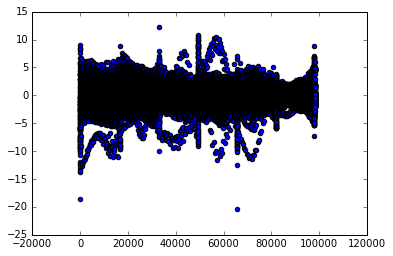

In [71]:
###Plot Wavelet Coefficients of a model
Vvals = ModelFile['v']
wvcoeffs = ModelFile['wvcoeffs']
Depths = ModelFile['depth']
###

Depth_Interest = 2 #Second Depth (In our case, 100)


Depth_100_Coeffs = wvcoeffs[0,NumVals*int(Depth_Interest-1):NumVals*int(Depth_Interest)]

plt.scatter(Indices,Depth_100_Coeffs)



In [75]:
####Get wavelet coefficients corresponding to a specific region. 

# First find points on the cubed sphere in the wavelet domain that 
# correspond to a specific lat/long range. 


# Then find the indices in the geographical domain that correspond to those pts


# Then extract!!! 

16384